[ 64  96 135]
[ 64  96 135]
Number of car images:  9988
Number of non-car images:  10093


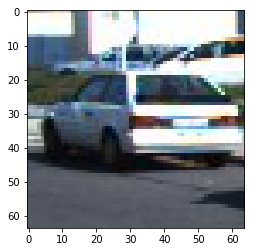

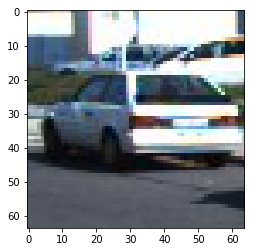

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
import glob
from skimage import io
%matplotlib inline
# import glob2


images = glob.glob('Data/smallset/**/*.jpeg', recursive=True)
cars = []
notcars = []
for image in images:
    if 'image' in image or 'extra' in image:
        notcars.append(image)
    else:
        cars.append(image)
        
        
images_bigset = glob.glob('Data/bigset/**/*.png', recursive=True)
# cars = []
# notcars = []
for image in images_bigset:
    if 'e0' in image:
        cars.append(image)
    else:
        notcars.append(image)


        
images_KITTI = glob.glob('Data/KITTI_extracted/**/*.png', recursive=True)
for image in images_KITTI:
    cars.append(image)

imagesample = mpimg.imread(cars[2])
# imagecolor = cv2.cvtColor(imagesample, cv2.COLOR_RGB2YCrCb)

skimg = io.imread(cars[2])
print(skimg[10][10])
# print(imagecolor[10][10])
print(imagesample[10][10])
print("Number of car images: ", len(cars))
print("Number of non-car images: ", len(notcars))
plt.figure()
plt.imshow(imagesample)
plt.figure()
plt.imshow(skimg)



In [4]:
print("Number of car images: ", len(cars))
print("Number of non-car images: ", len(notcars))



Number of car images:  9988
Number of non-car images:  10093


In [5]:
# from lesson_functions import *

# coding: utf-8

# In[ ]:

import numpy as np
import cv2
from skimage.feature import hog

def convert_color(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)

def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=False, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=False, 
                       visualise=vis, feature_vector=feature_vec)
        return features

def bin_spatial(img, size=(32, 32)):
    color1 = cv2.resize(img[:,:,0], size).ravel()
    color2 = cv2.resize(img[:,:,1], size).ravel()
    color3 = cv2.resize(img[:,:,2], size).ravel()
    return np.hstack((color1, color2, color3))
#     return color1
                        
def color_hist(img, nbins=32):    #bins_range=(0, 256)
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features
#     return channel1_hist



# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, cspace='RGB', spatial_size=(32, 32),hist_bins=32, hist_range=(0, 256), 
                      orient=9,pix_per_cell=8, cell_per_block=2, hog_channel=0):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        # Read in each one by one
#         image = mpimg.imread(file)
        image = io.imread(file)
        # apply color conversion if other than 'RGB'
        feature_image = convert_color(image, conv='RGB2YCrCb')
#         feature_image = image
             
        # Call get_hog_features() with vis=False, feature_vec=True
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))
            hog_features = np.ravel(hog_features)        
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            
        # Apply bin_spatial() to get spatial color features
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        # Apply color_hist() also with a color space option now
        hist_features = color_hist(feature_image, nbins=hist_bins)
        # Append the new feature vector to the features list
        features.append((np.concatenate((spatial_features, hist_features, hog_features))))
#         features.append((np.concatenate((hist_features, hog_features))))
#         features.append(np.array(hog_features))

    return features

In [4]:




cspace = 'YCrCb'
spatial_size = (16,16)
hist_bins = 32
orient = 12
pix_per_cell = 8
cell_per_block = 2
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
        
car_features = extract_features(cars, cspace=cspace, spatial_size=spatial_size,
                        hist_bins=hist_bins, hist_range=(0, 256), 
                      orient=orient,pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, hog_channel=hog_channel)
notcar_features = extract_features(notcars, cspace=cspace, spatial_size=spatial_size,
                        hist_bins=hist_bins, hist_range=(0, 256), 
                      orient=orient, pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, hog_channel=hog_channel)

if len(car_features) > 0:
    # Create an array stack of feature vectors
    X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
    car_ind = np.random.randint(0, len(cars))
    # Plot an example of raw and scaled features
    fig = plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(mpimg.imread(cars[car_ind]))
    plt.title('Original Image')
    plt.subplot(132)
    plt.plot(X[car_ind])
    plt.title('Raw Features')
    plt.subplot(133)
    plt.plot(scaled_X[car_ind])
    plt.title('Normalized Features')
    fig.tight_layout()
else: 
    print('Your function only returns empty feature vectors...')

NameError: name 'cars' is not defined

In [23]:
import pickle

with open('X_scaler_02.p','wb') as out:
    pickle.dump(X_scaler,out)

print("Saved X_scaler")
print(len(car_features[0]))

Saved X_scaler
7920


In [24]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
import time
# NOTE: the next import is only valid for scikit-learn version <= 0.17
# for scikit-learn >= 0.18 use:
# from sklearn.model_selection import train_test_split
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# colorspace = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
# orient = 6
pix_per_cell = 8
cell_per_block = 2
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"

# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)   
# print(X.shape)
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)
print(len(car_features))
print(scaled_X.shape)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

scaled_X_car = scaled_X[:len(car_features), :]
scaled_X_notcar = scaled_X[len(car_features):, :]

print(scaled_X_car.shape)

y_car = y[:len(car_features)]
y_notcar = y[len(car_features):]

rand_state = np.random.randint(0, 100)
X_train_car, X_test_car, y_train_car, y_test_car = train_test_split(
    scaled_X_car, y_car, test_size=0.3, random_state=rand_state)



X_train_notcar, X_test_notcar, y_train_notcar, y_test_notcar = train_test_split(
    scaled_X_notcar, y_notcar, test_size=0.3, random_state=rand_state)

print(X_train_car.shape)
print(X_train_notcar.shape)
X_train = np.concatenate((X_train_car, X_train_notcar))
y_train = np.concatenate((y_train_car, y_train_notcar))


X_test = np.concatenate((X_test_car, X_test_notcar))
y_test = np.concatenate((y_test_car, y_test_notcar))

X_train, y_train = shuffle(X_train, y_train, random_state=0)
X_test, y_test = shuffle(X_test, y_test, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
# y_train = np.vstack((y_train_car, y_train_notcar))





# # Split up data into randomized training and test sets
# rand_state = np.random.randint(0, 100)
# X_train, X_test, y_train, y_test = train_test_split(
#     scaled_X, y, test_size=0.3, random_state=rand_state)



9988
(20081, 7920)
(9988, 7920)
(6991, 7920)
(7065, 7920)
(14056, 7920) (14056,)
(6025, 7920) (6025,)


In [25]:


print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

Using: 12 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 7920
3.55 Seconds to train SVC...
Test Accuracy of SVC =  0.9935
My SVC predicts:  [ 0.  1.  0.  0.  1.  0.  1.  0.  1.  0.]
For these 10 labels:  [ 0.  1.  0.  0.  1.  0.  1.  0.  1.  0.]
0.00261 Seconds to predict 10 labels with SVC


In [26]:
# Save SVC
with open('SVC_02.p','wb') as out:
    pickle.dump(svc,out)
print("Saved SVC")

Saved SVC


In [27]:
print(len(X_train[0]))
print(len(car_features), len(notcar_features))
print(len(scaled_X))

7920
9988 10093
20081


In [9]:
# dist_pickle = pickle.load( open("svc_pickle.p", "rb" ) )
# svc = dist_pickle["svc"]
# X_scaler = X_scaler
import pickle
# import matplotlib.image as mpimg
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import cv2
# from skimage import io
%matplotlib inline

orient = 12
pix_per_cell = 8
cell_per_block = 2
spatial_size = (16, 16)
hist_bins = 32

orient = orient
pix_per_cell = pix_per_cell
cell_per_block = cell_per_block
spatial_size = spatial_size
hist_bins = hist_bins
print( orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

svc = pickle.load( open("SVC_01.p", "rb" ) )
X_scaler = pickle.load( open("X_scaler_01.p", "rb" ) )
# _01 test accuracy 99.35% Good performance on detection, 12 8 2 (16, 16) 32

12 8 2 (16, 16) 32


In [36]:

# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
#     img_ctrans = convert_color(img, conv='RGB2YCrCb')
    img_ctrans = img
    img_tosearch = img[ystart:ystop,:,:]
    ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YCrCb')
#     ctrans_tosearch = img_tosearch
    if scale != 1:
        imshape = ctrans_tosearch.shape
#         print(imshape)
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell)-1
    nyblocks = (ch1.shape[0] // pix_per_cell)-1 
    nfeat_per_block = orient*cell_per_block**2
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell)-1 
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    bboxes_predicted = []
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.concatenate((hog_feat1, hog_feat2, hog_feat3))
#             hog_features = hog_feat1

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            test_features = X_scaler.transform(np.concatenate((spatial_features, hist_features, hog_features)).reshape(1, -1))    
#             test_features = X_scaler.transform(np.concatenate((hist_features, hog_features)).reshape(1, -1))  
#             test_features = X_scaler.transform(hog_features.reshape(1,-1))
            
            #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                bbox = (xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart)
                cv2.rectangle(draw_img, (xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart), (0,0,255),6) 
                bboxes_predicted = bboxes_predicted + [bbox]
    return [draw_img, bboxes_predicted]

def find_windows(img, ystart, ystop, scale):
    
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
#     img_ctrans = convert_color(img, conv='RGB2YCrCb')
    img_ctrans = img
    img_tosearch = img[ystart:ystop,:,:]
#     ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YCrCb')
    ctrans_tosearch = img_tosearch
    if scale != 1:
        imshape = ctrans_tosearch.shape
#         print(imshape)
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    # Define blocks and steps as above
    nxblocks = (ctrans_tosearch.shape[1] // pix_per_cell)-1
    nyblocks = (ctrans_tosearch.shape[0] // pix_per_cell)-1 
    nfeat_per_block = orient*cell_per_block**2
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell)-1 
    cells_per_step = 4  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    
#     bboxes_predicted = []
    for xb in range(nxsteps+1):
        for yb in range(nysteps+1):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell
            
            xbox_left = np.int(xleft*scale)
            ytop_draw = np.int(ytop*scale)
            win_draw = np.int(window*scale)
            bbox = (xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart)
            cv2.rectangle(draw_img, (xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart), (0,0,255),6) 
#             bboxes_predicted = bboxes_predicted + [bbox]
    return draw_img

14


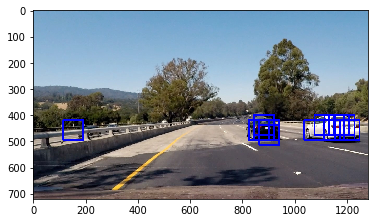

In [11]:


# svc = dist_pickle["svc"]
# X_scaler = dist_pickle["scaler"]
# orient = dist_pickle["orient"]
# pix_per_cell = dist_pickle["pix_per_cell"]
# cell_per_block = dist_pickle["cell_per_block"]
# spatial_size = dist_pickle["spatial_size"]
# hist_bins = dist_pickle["hist_bins"]
    
ystart = 400
ystop = 656
scale = 1.2
# img = mpimg.imread('test_images/test1.jpg')
img = io.imread('test_images/test4.jpg')
    
out_img, bboxes_img = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
print(len(bboxes_img))
plt.imshow(out_img)

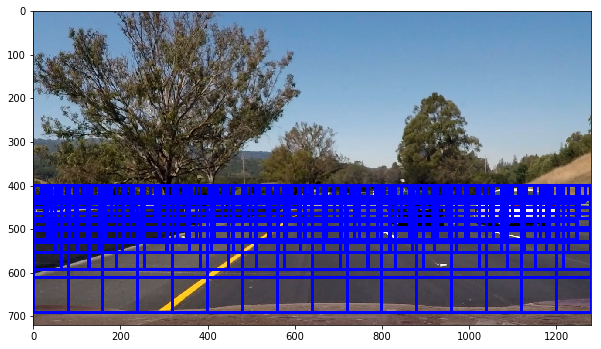

In [12]:
ystart = 450
ystop = 690
scale = 2.5

ystart_list = [400, 400, 400, 400, 400, 400, 450]
ystop_list = [450, 500, 530, 560, 600, 650, 700]
scale_list = [0.6, 0.8, 1, 1.3, 1.6, 2, 2.5]

# 400 to 450 0.6
# 400 to 500 0.8
# 400 to 530 1
# 400 to 560 1.3
# 400 to 600 1.6
# 400 to 650 2
# 450 to 700 2.5

img = io.imread('test_images/test6.jpg')

out_img = img
# bboxes_predicted = []
for ystart, ystop, scale in zip(ystart_list, ystop_list, scale_list):
#     print(ystart, ystop, scale)
    out_img = find_windows(out_img, ystart, ystop, scale)



# out_img = find_windows(img, ystart, ystop, scale)

plt.figure(figsize=(10,10))
plt.imshow(out_img)

In [13]:
print(bboxes_predicted[0])

NameError: name 'bboxes_predicted' is not defined

37 ((320, 400), (371, 451))


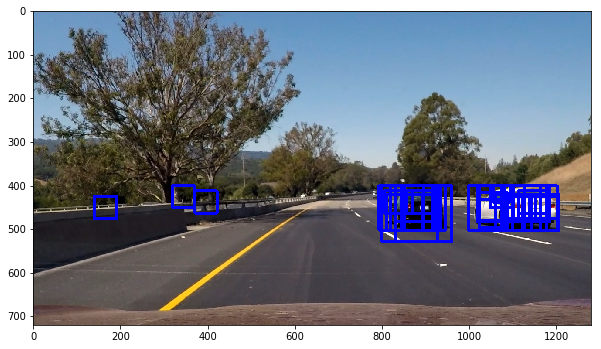

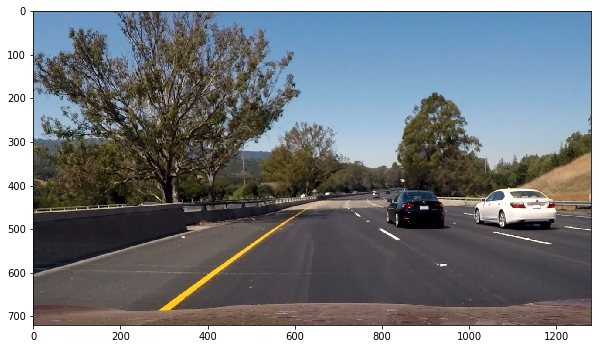

In [125]:


img = io.imread('test_images/test6.jpg')


bboxes_predicted = []
for ystart, ystop, scale in zip(ystart_list, ystop_list, scale_list):
#     print(ystart, ystop, scale)
#     out_img = find_windows(out_img, ystart, ystop, scale)
    out_img, bboxes = find_cars(img, ystart, ystop, scale, \
                   svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    bboxes_predicted = bboxes_predicted + bboxes



# bboxes_predicted = bboxes_predicted + [bbox]f

# for bbox in bboxes_predicted:
#     print(bbox[0])
print(len(bboxes_predicted), bboxes_predicted[2])
for bbox in bboxes_predicted:
    out_img = cv2.rectangle(out_img , bbox[0], bbox[1], (0,0,255), 6)


# out_img = find_windows(img, ystart, ystop, scale)

plt.figure(figsize=(10,10))
plt.imshow(out_img)

plt.figure(figsize=(10,10))
plt.imshow(img)

In [47]:

from scipy.ndimage.measurements import label

# Read in a pickle file with bboxes saved
# Each item in the "all_bboxes" list will contain a 
# list of boxes for one of the images shown above
# box_list = pickle.load( open( "bbox_pickle.p", "rb" ))

# Read in image similar to one shown above 
# image = mpimg.imread('test_image.jpg')



def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    nfalse = 0
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        minx = np.min(nonzerox)
        miny = np.min(nonzeroy)
        maxx = np.max(nonzerox)
        maxy = np.max(nonzeroy)
        
        if (maxx + maxy - minx - miny) > 50:
            bbox = ((minx, miny), (maxx, maxy))
            cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
        else:
            nfalse = nfalse + 1
            
#         bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
#         cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return [img, nfalse]

In [37]:
# img = io.imread('test_images/test6.jpg')
print(len(bboxes_predicted))
box_list = bboxes_predicted
image = img
heat = np.zeros_like(image[:,:,0]).astype(np.float)
# Add heat to each box in box list
heat = add_heat(heat,box_list)
    
# Apply threshold to help remove false positives
heat = apply_threshold(heat, 3)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img = draw_labeled_bboxes(np.copy(image), labels)

# bboxes = (((x1, y1), (x2, y2)), ((x1, y1), (x2, y2)), ((x1, y1), (x2, y2)))

fig = plt.figure(figsize=(21, 21))
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()


NameError: name 'bboxes_predicted' is not defined

In [120]:
print(labels)

(array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32), 2)


['test_images/test1.jpg', 'test_images/test2.jpg', 'test_images/test3.jpg', 'test_images/test4.jpg', 'test_images/test5.jpg', 'test_images/test6.jpg']
41
Cars by label:  2
False cars:  0
5
Cars by label:  0
False cars:  0
9
Cars by label:  1
False cars:  0
37
Cars by label:  3
False cars:  1
28
Cars by label:  2
False cars:  0
37
Cars by label:  2
False cars:  0


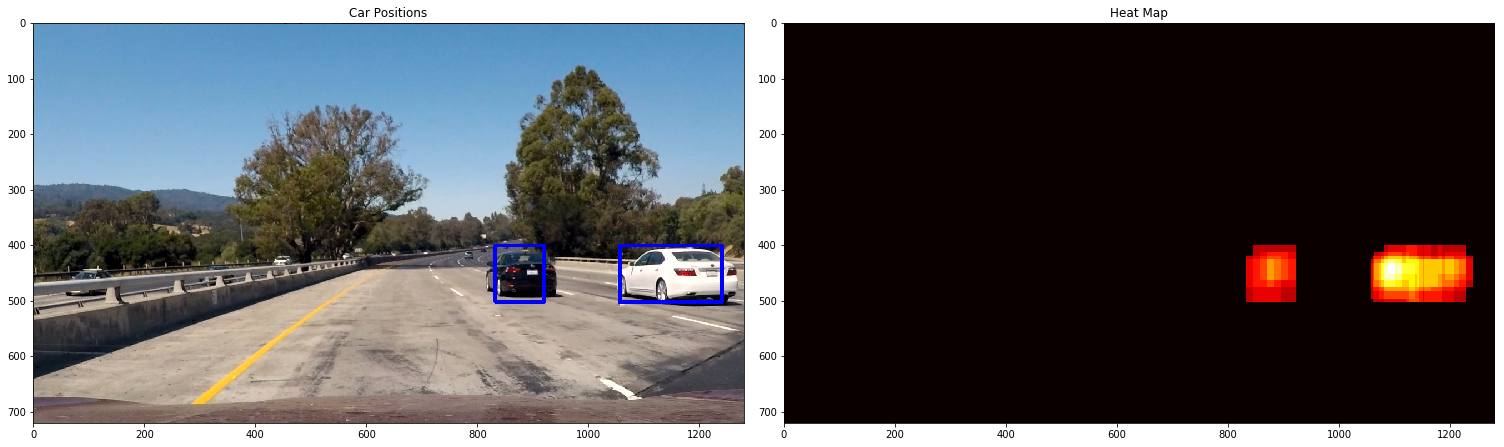

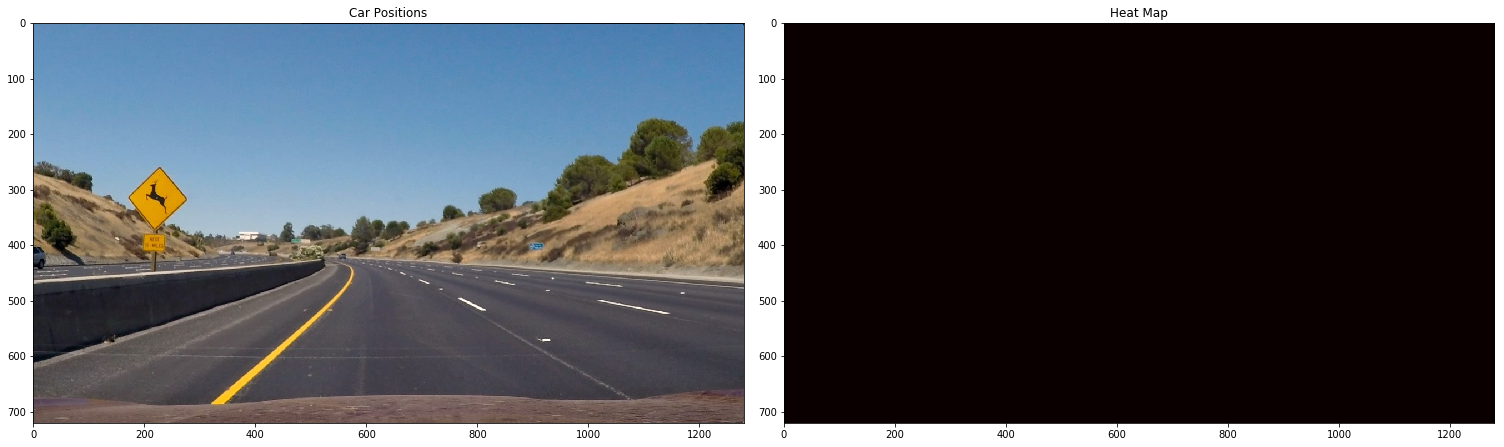

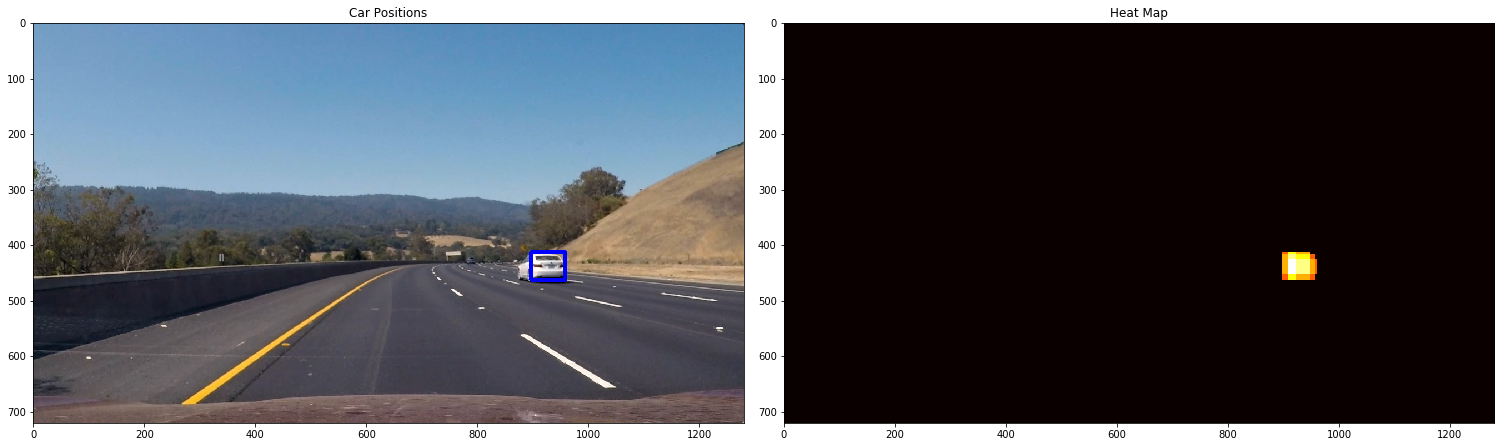

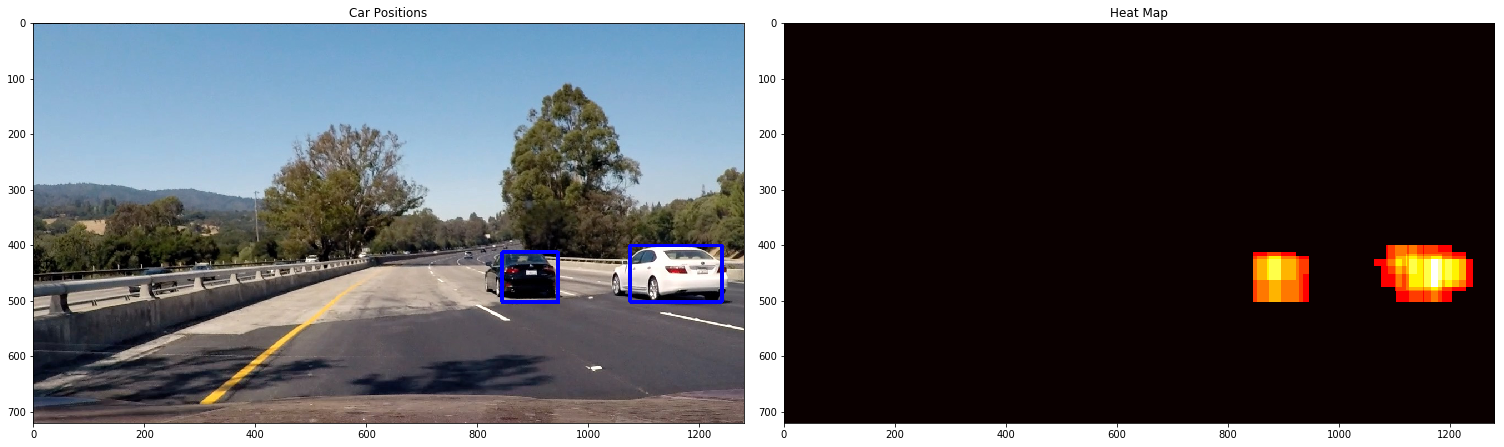

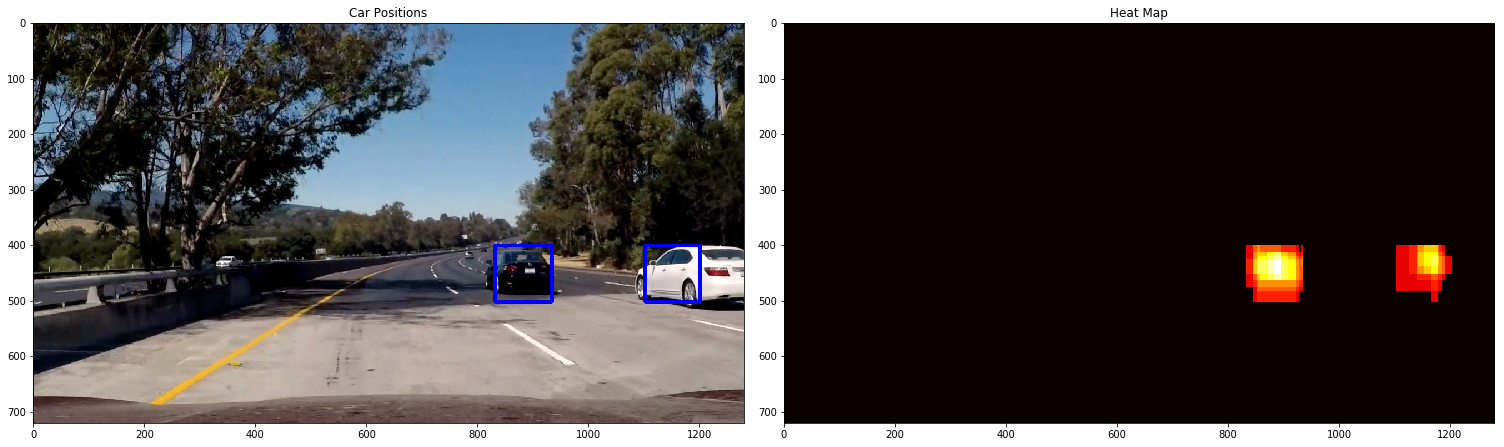

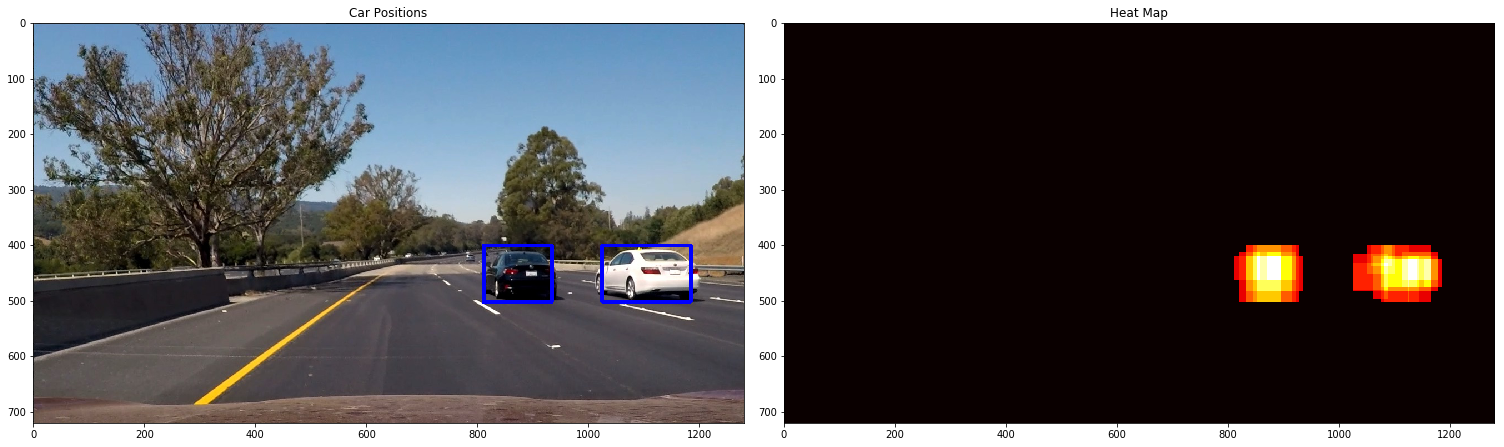

In [53]:
#  Single Pipeline to detect vehicles from scratch
def VD_Pipeline(img, heat_thresh):
    bboxes_predicted = []
    for ystart, ystop, scale in zip(ystart_list, ystop_list, scale_list):
    #     print(ystart, ystop, scale)
    #     out_img = find_windows(out_img, ystart, ystop, scale)
        out_img, bboxes = find_cars(img, ystart, ystop, scale, \
                   svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
        bboxes_predicted = bboxes_predicted + bboxes

    # img = io.imread('test_images/test6.jpg')
    print(len(bboxes_predicted))

    box_list = bboxes_predicted

    image = img
    heat = np.zeros_like(image[:,:,0]).astype(np.float)
    # Add heat to each box in box list
    heat = add_heat(heat,box_list)

    # Apply threshold to help remove false positives
    heat = apply_threshold(heat, heat_thresh)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)

    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    draw_img, nfalse = draw_labeled_bboxes(np.copy(image), labels)
    print("Cars by label: ", labels[1])
    print("False cars: ", nfalse)
    return [draw_img, heatmap]

testdir = 'test_images/test'

fnamelist = [testdir + str(i+1) + '.jpg' for i in range(6)]

print(fnamelist)

for fname in fnamelist:
    img = io.imread(fname)
#     img = io.imread('test_images/test4.jpg')
    draw_img, heatmap = VD_Pipeline(img, 3)

    # bboxes = (((x1, y1), (x2, y2)), ((x1, y1), (x2, y2)), ((x1, y1), (x2, y2)))
    fig = plt.figure(figsize=(21, 21))
    plt.subplot(121)
    plt.imshow(draw_img)
    plt.title('Car Positions')
    plt.subplot(122)
    plt.imshow(heatmap, cmap='hot')
    plt.title('Heat Map')
    fig.tight_layout()

In [ ]:
# filter
clear_map(current_map)
add_detection_rects_to_map(current_map)
heat_map = A * current_map + (1-A)*heat_map
A = 0.25 or 0.125